## Part A

## References:

https://www.geeksforgeeks.org/hog-feature-visualization-in-python-using-skimage/

https://www.geeksforgeeks.org/visualizing-colors-in-images-using-histogram-in-python/

https://www.geeksforgeeks.org/sift-interest-point-detector-using-python-opencv/

https://www.geeksforgeeks.org/python-opencv-canny-function/

https://medium.com/@mohitjavali/10-ways-to-extract-features-from-an-image-f44c8e9b0fbf

https://www.kaggle.com/code/kirollosashraf/human-action-recognition-har

### final pickle file : voting_classifier_model4.pkl : with 36.15% accuracy ( submitted max this )
### There is also a pickle file named voting_classifier_model2.pkl : with gave 36.31% accuracy ( this was before )




In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
dataset_path = "data\data"

In [8]:
label_csv_path = 'data\label.csv'

In [9]:
labels_df = pd.read_csv(label_csv_path)

In [10]:
labels_df.head()

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop


In [11]:
total = labels_df['label'].value_counts()

In [ ]:
# labels_df.head()

## a part

In [ ]:
'''
This code calculates the the distribution of image sizes
'''

image_sizes = []

count  = 0
for img_f in labels_df['filename']:
    img_path = os.path.join(dataset_path, img_f)
    img = Image.open(img_path)
    image_sizes.append(img.size)  # Size is (width, height)
    count += 1
    # print(count)

# Corresponding DataFrame
image_size_df = pd.DataFrame(image_sizes, columns=['width', 'height'])

In [ ]:
image_size_df.describe()

,width,height
count,12600.000000,12600.000000
mean,260.381032,196.573571
std,39.919281,35.281402
min,84.000000,84.000000
25%,254.000000,181.000000
50%,275.000000,183.000000
75%,276.000000,194.000000
max,478.000000,318.000000


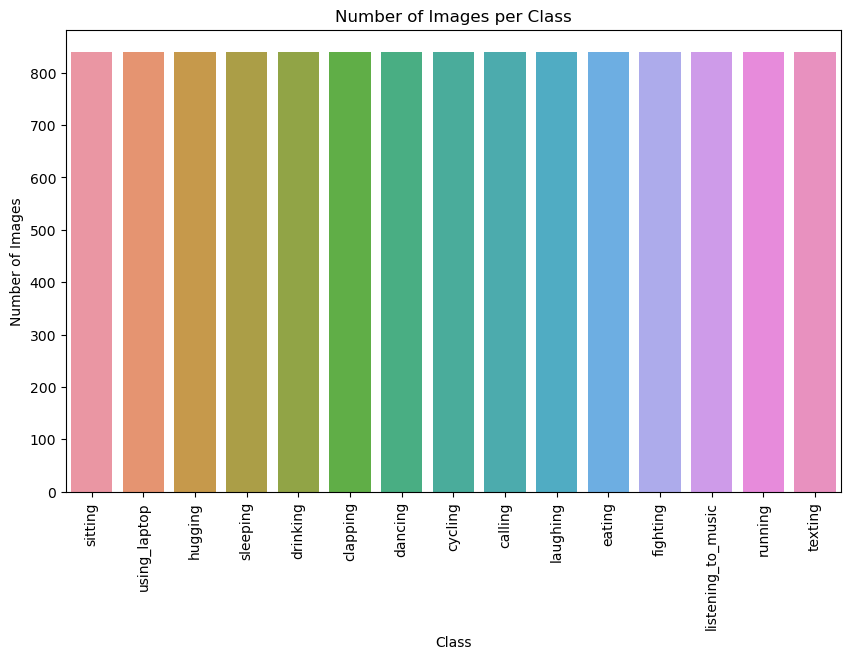

In [39]:
''''
the bar graphs which illustate the number of images per class
'''
plt.figure(figsize=(10, 6))
sns.barplot(x=total.index, y=total.values)
plt.title('Number of Images per Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)
plt.show()

## b part

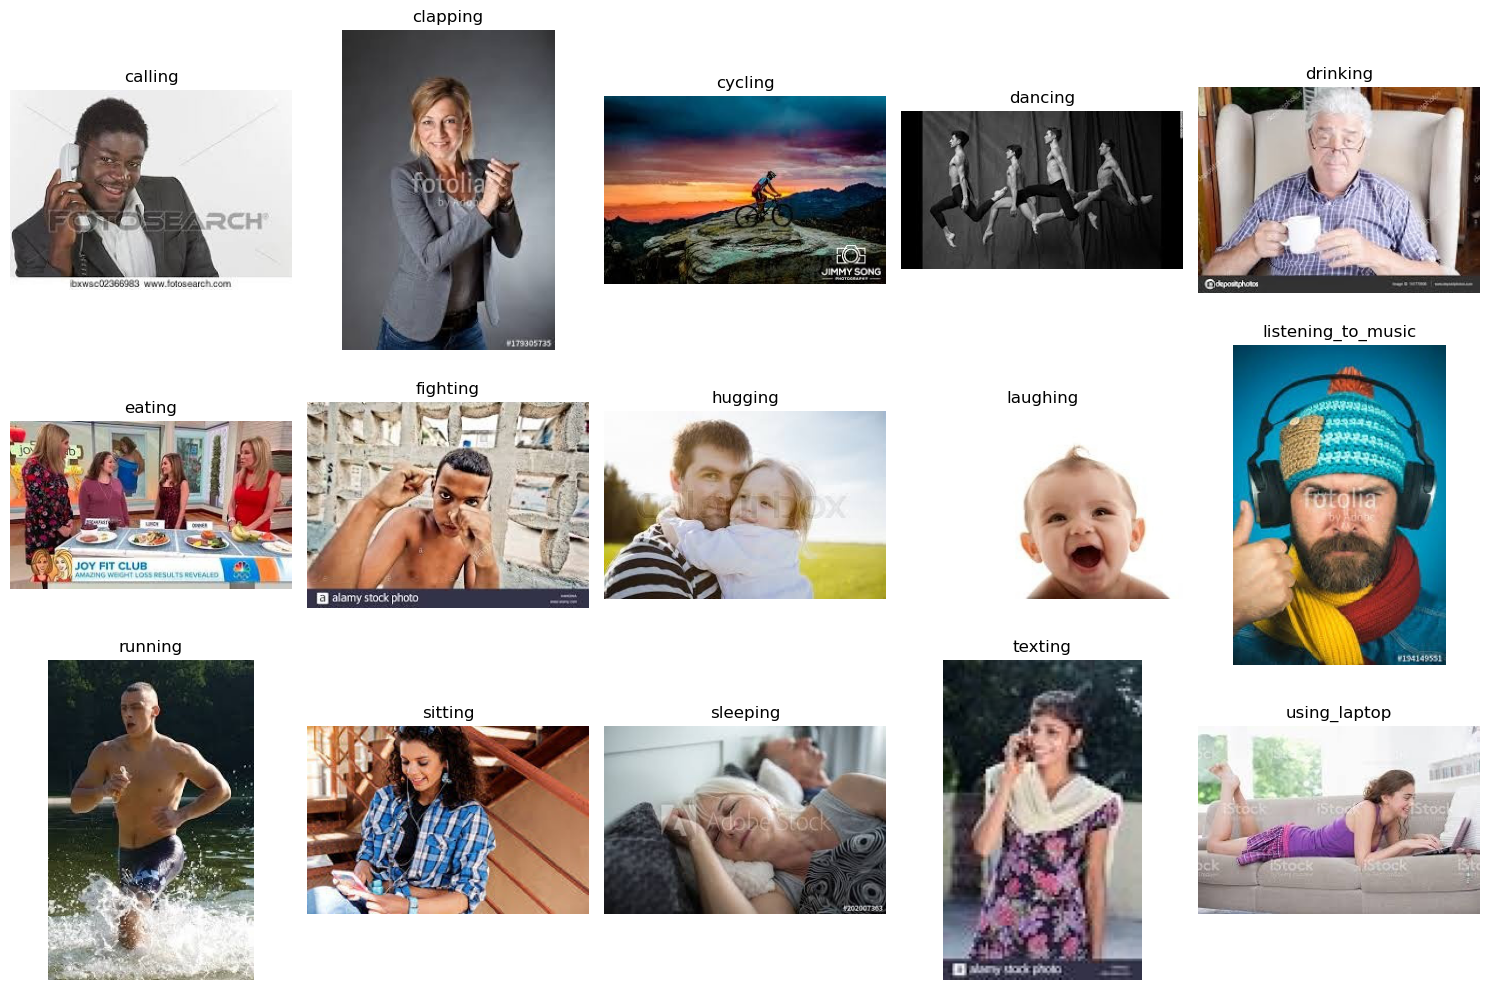

In [54]:
'''
This code takes 1 sample image from each class and displays it
'''


image_path = "data\data"
sample_images = {}


for class_name, group in labels_df.groupby('label'):
    sample_images[class_name] = group['filename'].iloc[0]

plt.figure(figsize=(15, 10))
for i, (class_name, img_file) in enumerate(sample_images.items()):
    img_path = os.path.join(image_path, img_file)
    img = Image.open(img_path)
    plt.subplot(3, 5, i + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()

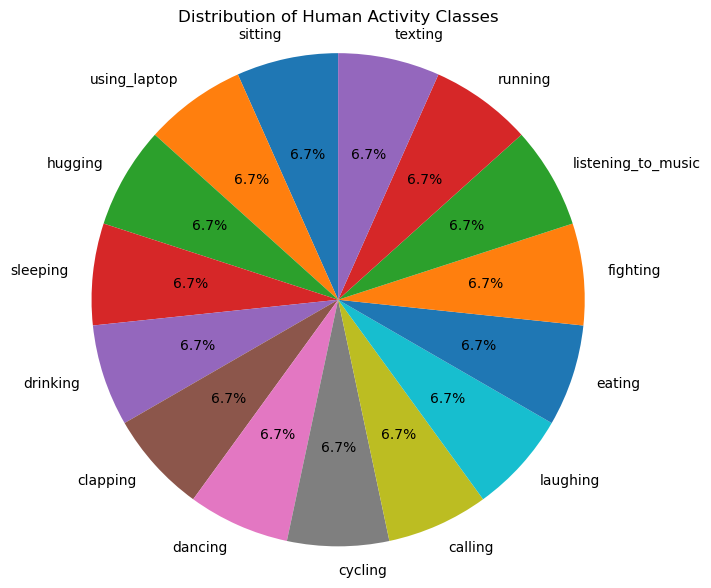

In [23]:
'''
The distribution of classes
'''

labels = total.index  
sizes = total.values 

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Human Activity Classes')
plt.show()

## c part

### The class distribution is discussed in the above parts. They are not imbalances present the data is well distributed , however the data contains 126001 images whereas there are only 12600 labels so ignored that 1 particular image

##Part B

In [15]:
from skimage import color
from skimage.feature import hog
from skimage import data, exposure, io
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray

c:\Users\aarzo\anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



##HOG

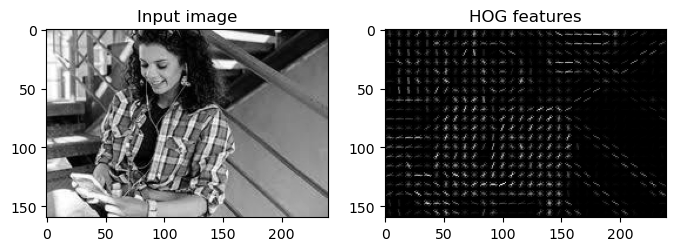

Shape of HOG features: (19836,)


In [41]:
'''
The HOG features extraction method computes histograms of oriented gradients in localized regions of the image
The below code takes pixels per cell 8*8 and cells per block 2*2 for it
'''
image =  "data\data\Image_1.jpg"
image = Image.open(image)
image_gray = color.rgb2gray(image)

# Extracting HOG features
features, hog_image = hog(image_gray, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), visualize=True)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Input image')

plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG features')
plt.show()

# The shape of the HOG features
print("Shape of HOG features:", features.shape)

## Color Histogram

In [ ]:
'''
Color Histogram method gets the RGB data from the image and corresponding plots for it are drawn for an image
'''
def extract_color_histogram(image_path, bins=(8, 8, 8)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # Converting it to HSV color space
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()  # Normalize and flatten

    return hist

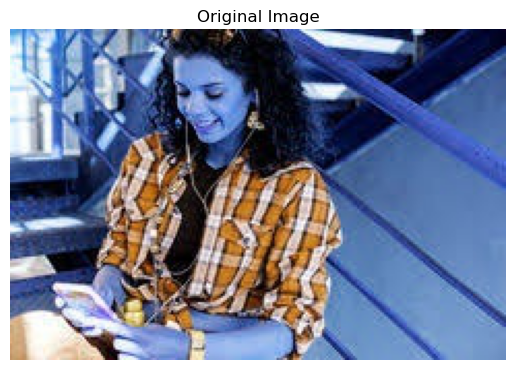

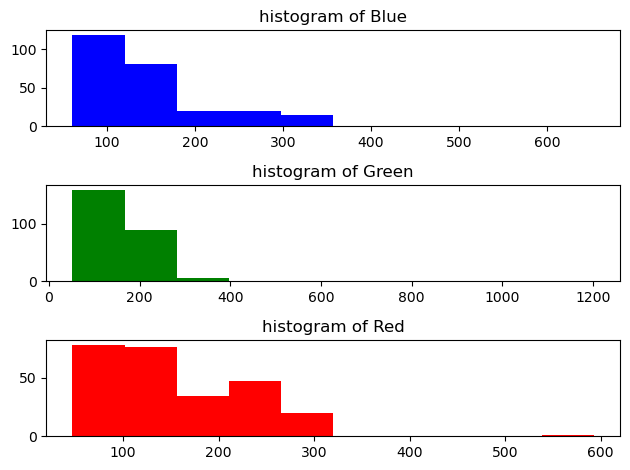

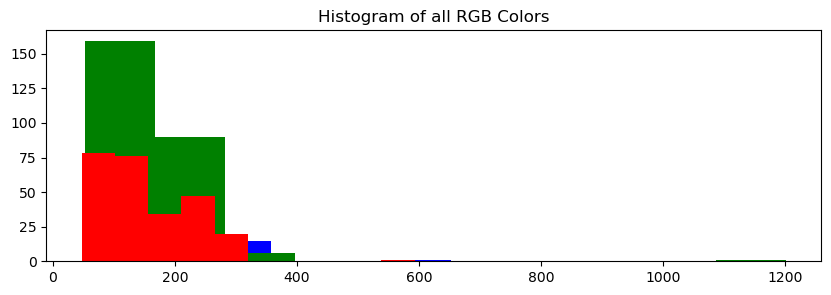

In [42]:
image =  "data\data\Image_1.jpg"
image= Image.open(image)
imageObj = np.array(image)

plt.axis("off")
plt.title("Original Image")
plt.imshow(cv2.cvtColor(imageObj, cv2.COLOR_BGR2RGB))
plt.show()

# Get RGB data from image
blue_color = cv2.calcHist([imageObj], [0], None, [256], [0, 256])
red_color = cv2.calcHist([imageObj], [1], None, [256], [0, 256])
green_color = cv2.calcHist([imageObj], [2], None, [256], [0, 256])

plt.subplot(3, 1, 1)
plt.title("histogram of Blue")
plt.hist(blue_color, color="blue")
print()
plt.subplot(3, 1, 2)
plt.title("histogram of Green")
plt.hist(green_color, color="green")
print()
plt.subplot(3, 1, 3)
plt.title("histogram of Red")
plt.hist(red_color, color="red")
print()
plt.tight_layout()
plt.show()

# combined histogram
plt.figure(figsize=(10, 3))
plt.title("Histogram of all RGB Colors")
plt.hist(blue_color, color="blue")
plt.hist(green_color, color="green")
plt.hist(red_color, color="red")
plt.show()

## LBP

Feature Shape of the Image: (160, 240, 3)


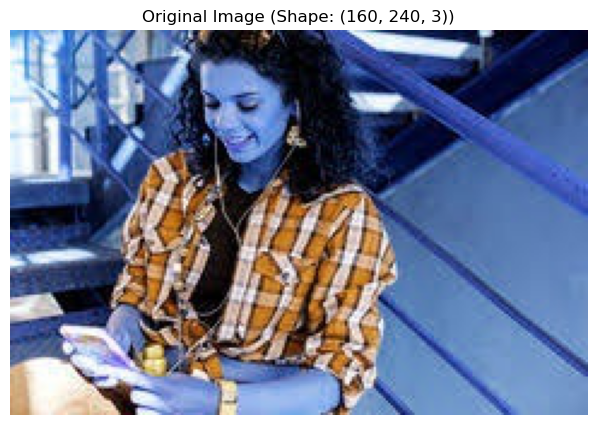

LBP Feature Shape: (10,)
LBP Features: [0.06289062 0.07846354 0.05018229 0.11223958 0.16765625 0.12981771
 0.0696875  0.08872396 0.10921875 0.13111979]


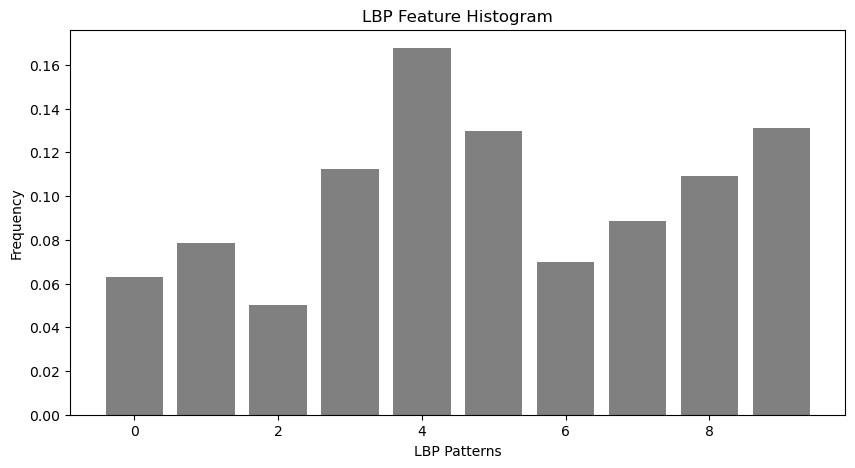

In [43]:
'''
Extracting LBP (Local Binary Patterns) features from the image.
P: Number of circularly symmetric neighbor set points.
R: Radius of circle.
'''

def extract_lbp_features(image, P=8, R=1):
    gray_image = rgb2gray(image)  # Converting  the image to grayscale
    gray_image = (gray_image * 255).astype(np.uint8)
    lbp = local_binary_pattern(gray_image, P, R, method="uniform")

    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, P + 3), range=(0, P + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)

    return hist

image_path = "data\data\Image_1.jpg"
image = Image.open(image_path)
image_obj = np.array(image)

feature_shape = image_obj.shape
print("Feature Shape of the Image:", feature_shape)

plt.figure(figsize=(10, 5))
plt.axis("off")
plt.title(f"Original Image (Shape: {feature_shape})")
plt.imshow(cv2.cvtColor(image_obj, cv2.COLOR_BGR2RGB))
plt.show()

# Extract LBP features
lbp_features = extract_lbp_features(image_obj)
print("LBP Feature Shape:", lbp_features.shape)
print("LBP Features:", lbp_features)

plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(lbp_features)), lbp_features, color='gray')
plt.title("LBP Feature Histogram")
plt.xlabel("LBP Patterns")
plt.ylabel("Frequency")
plt.show()


## Part C

## Models Implementaion

In [ ]:
%pip install xgboost

In [14]:
import numpy as np
import pandas as pd
import pickle
import cv2
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score

In [3]:
'''
Resizing the image and then converting the image to gray scale followed by a combination of lbp + color histogram for feature extraction
'''

def extract_enhanced_features(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    image = cv2.resize(image, (128, 128))
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # LBP Feature Extraction
    lbp_radius = 2
    lbp_n_points = 8 * lbp_radius
    lbp = local_binary_pattern(gray_image, lbp_n_points, lbp_radius, method='uniform')
    (lbp_hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, lbp_n_points + 3), range=(0, lbp_n_points + 2))
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= lbp_hist.sum()

    # Color Histogram Extraction
    color_hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    color_hist = color_hist.flatten()
    color_hist /= color_hist.sum()

    # Combine features
    combined_features = np.hstack([lbp_hist, color_hist])

    return combined_features

In [4]:
'''
The function extracts the features from the dataset followed by encding the label
because it was a categorical value and then finally converting our data into dataframes

'''

def extract_features_for_dataset(image_dir, labels_df):
    features_list = []
    labels = []

    #Conatins the list of image filenames from the labels DataFrame
    image_files = labels_df['filename'].tolist()

    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)
        if not os.path.exists(image_path):
            print(f"Warning: Image file does not exist for {image_file}")
            continue

        # Extracting the combined features from the function mentioned above
        combined_features = extract_enhanced_features(image_path)


        label = labels_df[labels_df['filename'] == image_file]['label'].values[0]
        features_list.append(combined_features)
        labels.append(label)

    X_df = pd.DataFrame(features_list)

    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(labels)
    y_df = pd.DataFrame(y_encoded, columns=['label'])

    dataset_df = pd.concat([X_df, y_df], axis=1)

    return dataset_df

In [17]:
image_dir = "data\data"
dataset_df = extract_features_for_dataset(image_dir, labels_df)

In [11]:
dataset_df

,0,1,2,3,4,5,6,7,8,9,...,521,522,523,524,525,526,527,528,529,label
0,0.059326,0.041931,0.038025,0.026917,0.027832,0.028625,0.034790,0.056458,0.080872,0.051941,...,0.000488,0.0,0.0,0.0,0.0,0.0,0.000244,0.010498,0.034302,11
1,0.047485,0.039429,0.023438,0.019714,0.018005,0.026794,0.033386,0.051880,0.073059,0.083557,...,0.000854,0.0,0.0,0.0,0.0,0.0,0.000000,0.007507,0.245056,14
2,0.030945,0.023926,0.021301,0.019775,0.019165,0.036072,0.052429,0.084106,0.108459,0.112122,...,0.000305,0.0,0.0,0.0,0.0,0.0,0.000305,0.007202,0.281067,7
3,0.045471,0.032043,0.029602,0.024048,0.024719,0.032654,0.044434,0.086426,0.137268,0.087585,...,0.000122,0.0,0.0,0.0,0.0,0.0,0.000000,0.001221,0.018066,12
4,0.050659,0.039124,0.033752,0.027100,0.027710,0.034485,0.041626,0.075134,0.106262,0.072937,...,0.000061,0.0,0.0,0.0,0.0,0.0,0.000061,0.003418,0.000549,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,0.052002,0.046021,0.032104,0.026001,0.023804,0.030457,0.038391,0.057739,0.081482,0.060608,...,0.000244,0.0,0.0,0.0,0.0,0.0,0.000061,0.002319,0.015686,11
12596,0.056030,0.051331,0.029053,0.019531,0.017578,0.022705,0.027405,0.040405,0.051636,0.062744,...,0.001465,0.0,0.0,0.0,0.0,0.0,0.000000,0.005737,0.327026,1
12597,0.058411,0.045654,0.030457,0.021423,0.021423,0.026917,0.030334,0.046448,0.058655,0.058838,...,0.002014,0.0,0.0,0.0,0.0,0.0,0.000000,0.003967,0.082214,11
12598,0.008362,0.009766,0.006714,0.006042,0.006531,0.014160,0.021118,0.033569,0.036560,0.075012,...,0.000183,0.0,0.0,0.0,0.0,0.0,0.000000,0.001831,0.890686,3


In [19]:
X = dataset_df.drop('label', axis=1)
y = dataset_df['label']

In [ ]:
# X_y = X.copy()
# X_y['label'] = y

# X_y.to_csv('dataset.csv', index=False)
# data = pd.read_csv('dataset.csv')

# X_loaded = data.drop('label', axis=1)
# y_loaded = data['label']

In [ ]:
# # Splitting the dataset into 80% training and 20% testing
# X_train, X_test, y_train, y_test = train_test_split(X_loaded, y_loaded, test_size=0.2, random_state=42)

# print(f"Training set shape: {X_train.shape}, {y_train.shape}")
# print(f"Test set shape: {X_test.shape}, {y_test.shape}")

In [44]:
# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (10080, 530), (10080,)
Test set shape: (2520, 530), (2520,)


In [ ]:
# Splitting the dataset into 80% training and 20% testing
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the splits to ensure correctness
print(f"Training set shape: {X_train1.shape}, {y_train1.shape}")
print(f"Test set shape: {X_test1.shape}, {y_test1.shape}")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)

Training set shape: (10080, 538), (10080,)
Test set shape: (2520, 538), (2520,)


## Model 1 : Voting Classifier which gave the best accuracy so far

In [32]:
vt = VotingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=1000)), ('gnb', GaussianNB()), ('dt', DecisionTreeClassifier())], voting='hard',weights=[3,1,1])

model = vt.fit(X_train,y_train)
model.score(X_train,y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 36.15%


In [22]:
vt = VotingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=1000)), ('gnb', GaussianNB()), ('dt', DecisionTreeClassifier())], voting='hard',weights=[3,1,1])

model = vt.fit(X_train,y_train)
model.score(X_train,y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 36.03%


In [45]:
vt = VotingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=1000)), ('gnb', GaussianNB()), ('dt', DecisionTreeClassifier())], voting='hard',weights=[3,1,1])

model = vt.fit(X_train,y_train)
model.score(X_train,y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 35.83%


In [29]:
# Function to save the model
def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved to {filename}")

# Function to load the model
def load_model(filename):
    with open(filename, 'rb') as file:
        loaded_model = pickle.load(file)
    print(f"Model loaded from {filename}")
    return loaded_model

In [55]:
model_filename = 'voting_classifier_model4.pkl'

In [34]:
save_model(model, model_filename)

Model saved to voting_classifier_model4.pkl


In [56]:
loaded_model = load_model(model_filename)

loaded_y_pred = loaded_model.predict(X_test)
loaded_accuracy = accuracy_score(y_test, loaded_y_pred)
print(f"Loaded Model Test Accuracy: {loaded_accuracy * 100:.2f}%")

Model loaded from voting_classifier_model4.pkl
Loaded Model Test Accuracy: 36.15%


In [ ]:
vt = VotingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=1000)), ('gnb', GaussianNB()), ('dt', DecisionTreeClassifier())], voting='hard',weights=[3,1,1])


model = vt.fit(X_train,y_train)
model.score(X_train,y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 35.99%


In [ ]:
model_filename = 'voting_classifier_model.pkl'
save_model(model, model_filename)

Model saved to voting_classifier_model.pkl


In [ ]:
loaded_model = load_model(model_filename)

loaded_y_pred = loaded_model.predict(X_test)
loaded_accuracy = accuracy_score(y_test, loaded_y_pred)
print(f"Loaded Model Test Accuracy: {loaded_accuracy * 100:.2f}%")

Model loaded from voting_classifier_model.pkl
Loaded Model Test Accuracy: 35.99%


## Model 2 : Random Forest

In [52]:
rf_model = RandomForestClassifier(n_estimators=1000, max_features = None ,random_state=42)

rf_model.fit(X_train, y_train)

print("Random Forest training completed.")

Random Forest training completed.


In [ ]:
rf_model_filename = 'random_forest_model.pkl'

In [ ]:
save_model(rf_model, rf_model_filename)

In [ ]:
loaded_rf_model = load_model(rf_model_filename)

loaded_rf_y_pred = loaded_rf_model.predict(X_test_scaled)
loaded_rf_accuracy = accuracy_score(y_test, loaded_rf_y_pred)
print(f"Loaded Random Forest Model Test Accuracy: {loaded_rf_accuracy * 100:.2f}%")

In [53]:
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 35.08%


## Model 3 : XGB Boosting

In [32]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# plot_importance(xgb_model, importance_type='weight')  # Can change importance_type to 'gain' or 'cover'
# plt.title("Feature Importance")
# plt.show()

c:\Users\aarzo\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning:

[15:59:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Model Accuracy: 34.25%


## Model 4 : Decision Tree

In [33]:
def decision_tree_model(X, y):

    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")

    return clf


In [34]:
decision_tree_model(X, y)

Decision Tree Accuracy: 18.13%


DecisionTreeClassifier(random_state=42)

## Model 5 : Naive Bayes

In [35]:
def naive_bayes_model(X, y):

    clf = GaussianNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Naive Bayes Accuracy: {accuracy * 100:.2f}%")

    return clf


In [36]:
naive_bayes_model(X, y)

Naive Bayes Accuracy: 13.02%


GaussianNB()

## Model 6 : Perceptron Classifier

In [37]:
def perceptron_model(X, y):
    clf = Perceptron(max_iter=1000, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Perceptron Accuracy: {accuracy * 100:.2f}%")

    return clf


In [38]:
perceptron_model(X, y)

Perceptron Accuracy: 13.81%


Perceptron(random_state=42)

## Comparsion and Anaylsis

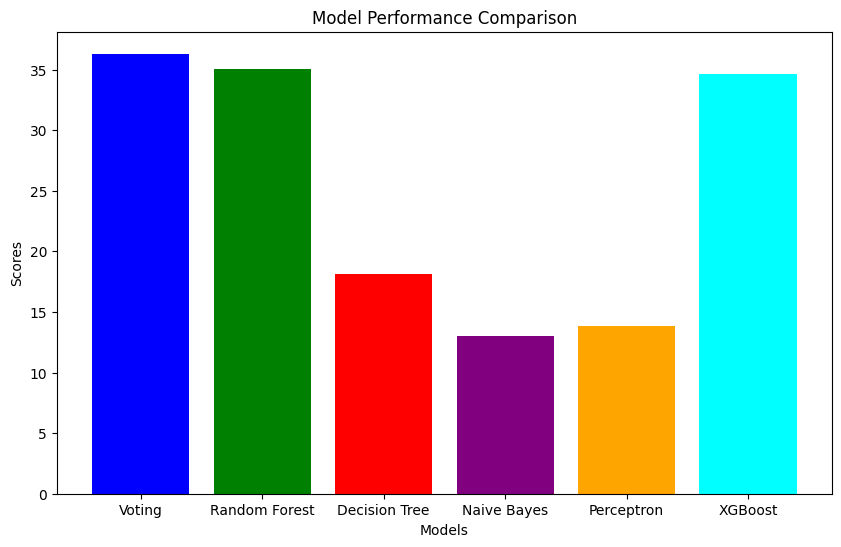

In [ ]:
import matplotlib.pyplot as plt

models = ['Voting', 'Random Forest', 'Decision Tree', 'Naive Bayes', 'Perceptron', 'XGBoost']
values = [36.31, 35.08, 18.13, 13.02, 13.81, 34.60]

plt.figure(figsize=(10, 6))
plt.bar(models, values, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.show()
